## Motivation analysis test data

Goal: Given the motivation analysis test data we would like to answer to the following questions: 
        - Can we find groups of patients answering similarly? If so how many groups. 
        - Secondly, can we group motivations together? 


### Libraries

In [17]:
# Data Manipulation

import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree


# Preprocessing

from sklearn import preprocessing
from sklearn import utils

# Cross Validation
from sklearn.model_selection import cross_val_score

# Unsupervised learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate

# Train test split
from sklearn.model_selection import train_test_split





### Dataset and visualization

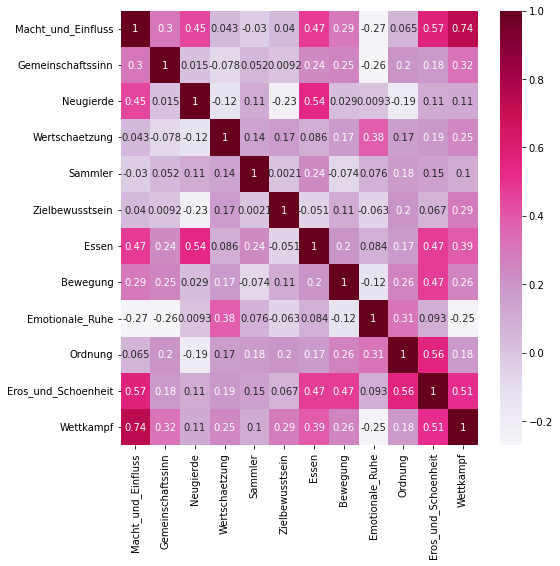

In [18]:
data = pd.read_excel('Vinyu_Motivation_Challenge_Test.xlsx')
#data.head(5)

df = data.copy()   # save a copy of data 


# Let's check the correlation between the features

plt.figure(figsize=(8,8))

sns.heatmap(data.corr(),
            annot = True,
            annot_kws = {"fontsize":10},
            cmap='PuRd');

In [19]:
data.head(4)

,Patient_ID,Macht_und_Einfluss,Gemeinschaftssinn,Neugierde,Wertschaetzung,Sammler,Zielbewusstsein,Essen,Bewegung,Emotionale_Ruhe,Ordnung,Eros_und_Schoenheit,Wettkampf
0,P1,-0.428571,-0.285714,-0.428571,-0.428571,-0.285714,0.000000,-0.428571,-0.714286,0.000000,-0.428571,-0.285714,-0.285714
1,P2,0.285714,0.142857,1.000000,0.285714,0.571429,-0.428571,1.428571,-1.857143,1.142857,-0.428571,0.285714,-0.142857
2,P3,1.285714,0.571429,0.285714,0.714286,0.428571,0.428571,1.428571,0.571429,1.428571,1.000000,1.142857,0.714286
3,P4,1.428571,-0.142857,1.142857,0.428571,0.428571,0.000000,1.285714,-0.285714,1.428571,0.857143,1.000000,0.571429


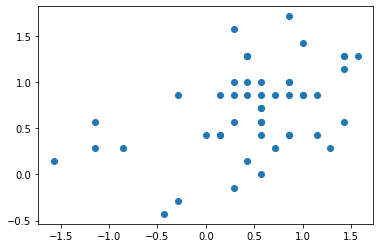

In [20]:
plt.scatter(data.iloc[:,1], data.iloc[:,3])

From the heatmap we already see that there is a relative strong correlation between "Macht_und_Einfluss" and "Wettkampf", "Ordnung" and "Eros_und_Schoenheit", "Macht_und_Einfluss" and "Eros_und_Schoenheit", "Essen" and "Neugierde". Therefore, by the law of transitivity, we can first say that "Macht_und_Einfluss", "Wettkampf", "Ordnung", "Eros_und_Schoenheit", "Neugierde" can be grouped together.

In [21]:
# Scatter plot between some features to see if there is any clustering pattern 
fig = px.scatter_3d(data, 
                    x = 'Macht_und_Einfluss',
                    y = 'Wettkampf',
                    z = 'Essen')
fig.show()


For the selected features no clustering pattern is apparent

## Let's try different unsupervised algorithms

### K-means

Text(0.5, 0, 'k cluster number')

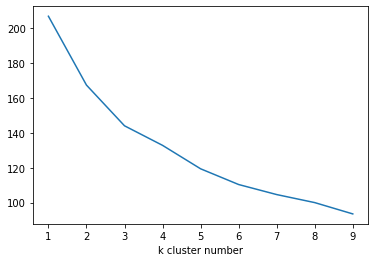

In [22]:
# For a good performance of the model it's a good practice to the optimal K

data =data.loc[:, data.columns!='Patient_ID']
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(data)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

From the above plot we can that there are elbows at k = 2, k:3, k=5, k=8. Here k =5 looks promising.

In [23]:
# remove the Patient_ID column and transform the data. 


data =data.loc[:, data.columns!='Patient_ID']
pca = PCA(2)

#Transform the data (We used PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot)
df_new = pca.fit_transform(data)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_new)


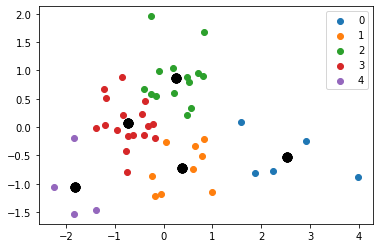

In [24]:
#Getting unique labels
 
u_labels = np.unique(label)

#Getting the Centroids
centroids = kmeans.cluster_centers_
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [25]:
# let's visualize the predicted clustering (Here one can see which patients cluster )

df['clusters'] = label
df_0 = df[df.clusters == 0]
df_1 = df[df.clusters == 1]
df_2 = df[df.clusters == 2]
df_3 = df[df.clusters == 3]
df_2.head(4)

,Patient_ID,Macht_und_Einfluss,Gemeinschaftssinn,Neugierde,Wertschaetzung,Sammler,Zielbewusstsein,Essen,Bewegung,Emotionale_Ruhe,Ordnung,Eros_und_Schoenheit,Wettkampf,clusters
1,P2,0.285714,0.142857,1.000000,0.285714,0.571429,-0.428571,1.428571,-1.857143,1.142857,-0.428571,0.285714,-0.142857,2
4,P5,0.000000,0.000000,0.428571,0.714286,0.285714,0.285714,1.000000,-0.857143,1.285714,0.857143,0.142857,-0.142857,2
6,P7,0.571429,0.571429,0.857143,0.285714,0.285714,-0.428571,1.142857,-1.428571,1.000000,0.714286,0.285714,0.142857,2
12,P13,0.857143,-0.857143,1.000000,1.142857,1.571429,0.142857,1.714286,-1.142857,1.571429,-0.285714,0.428571,0.714286,2


In [26]:
df_2.index

Int64Index([1, 4, 6, 12, 15, 16, 17, 18, 20, 21, 30, 34, 36, 38], dtype='int64')

In [27]:
df_2= df_2.set_index('Patient_ID')

In [28]:
df_2.index

Index(['P2', 'P5', 'P7', 'P13', 'P16', 'P17', 'P18', 'P19', 'P21', 'P22',
       'P31', 'P35', 'P37', 'P39'],
      dtype='object', name='Patient_ID')

## Similarity study

In [29]:
indices = df_2.index.to_list()
indices

['P2',
 'P5',
 'P7',
 'P13',
 'P16',
 'P17',
 'P18',
 'P19',
 'P21',
 'P22',
 'P31',
 'P35',
 'P37',
 'P39']

In [30]:
## computing the euclidian distance between 2 by 2 patients

#squareform(pdist(df_2, lambda u,v: np.sqrt(((u-v)**2).sum())))

In [33]:
# similarity check between patients in class 2 using the Euclidian distance
from scipy.spatial.distance import squareform, pdist
class_2_eu = pd.DataFrame(
    squareform(pdist(df_2.loc[indices])),
    columns = indices,
    index = indices
)

In [34]:
# similarity check between patients in class 2 using the Minkowski distance

class_2_mink = pd.DataFrame(
    squareform(pdist(df_2.loc[indices], 'minkowski', p=2)),
    columns = indices,
    index = indices
)


In [35]:
# similarity check between patients in class 2 using the Cosine distance


class_2_cos = pd.DataFrame(
    squareform(pdist(df_2.loc[indices], metric ='cosine')),
    columns = indices,
    index = indices
)

<AxesSubplot:>

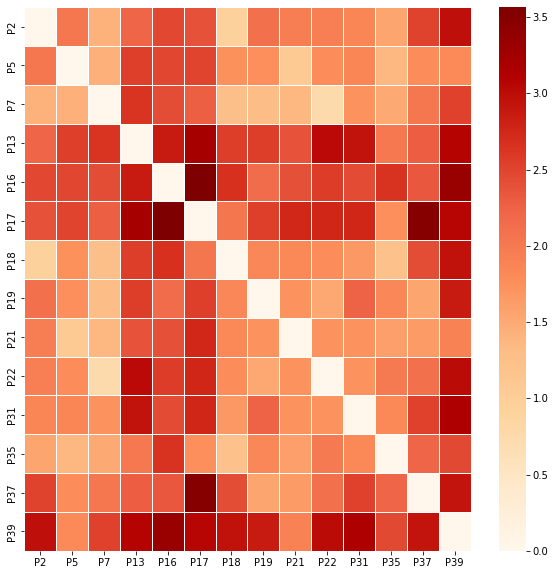

In [36]:
# plot the heatmap for visualization it with seaborn (euclidian and Minkowski distances)
plt.figure(figsize=(10,10))
sns.heatmap(
    class_2_eu,
    cmap='OrRd',
    linewidth=1
)

<AxesSubplot:>

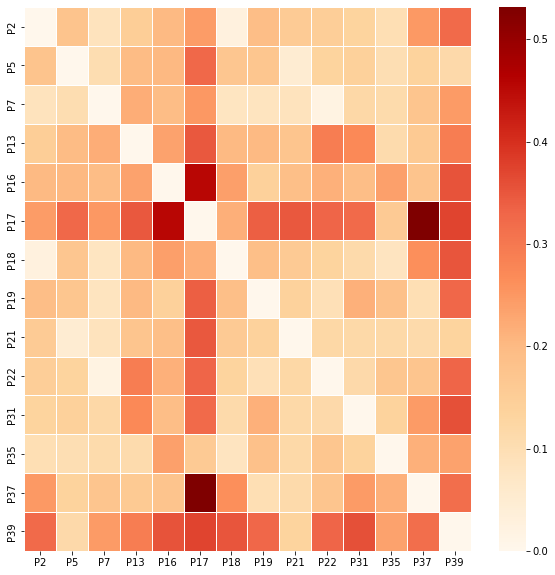

In [37]:
# plot the heatmap for visualization it with seaborn (cosine distance)
plt.figure(figsize=(10,10))
sns.heatmap(
    class_2_cos,
    cmap='OrRd',
    linewidth=1
)

In [38]:
# move to long form
long_form = class_2_cos.unstack()
long_form.index

MultiIndex([( 'P2',  'P2'),
            ( 'P2',  'P5'),
            ( 'P2',  'P7'),
            ( 'P2', 'P13'),
            ( 'P2', 'P16'),
            ( 'P2', 'P17'),
            ( 'P2', 'P18'),
            ( 'P2', 'P19'),
            ( 'P2', 'P21'),
            ( 'P2', 'P22'),
            ...
            ('P39', 'P16'),
            ('P39', 'P17'),
            ('P39', 'P18'),
            ('P39', 'P19'),
            ('P39', 'P21'),
            ('P39', 'P22'),
            ('P39', 'P31'),
            ('P39', 'P35'),
            ('P39', 'P37'),
            ('P39', 'P39')],
           length=196)

In [39]:
# rename columns and turn into a dataframe
long_form.index.rename(['PA', 'PB'], inplace=True)
long_form = long_form.to_frame('cosine distance').reset_index()
#long_form[
 #   (long_form['cosine distance'] < 0.05) 
  #  & (long_form['PA'] != long_form['PB'])
#]
long_form

,PA,PB,cosine distance
0,P2,P2,0.000000
1,P2,P5,0.174929
2,P2,P7,0.083344
3,P2,P13,0.150388
4,P2,P16,0.200304
...,...,...,...
191,P39,P22,0.330454
192,P39,P31,0.358097
193,P39,P35,0.234910
194,P39,P37,0.315733


### Let's supervised the K-means by fixing one feature as true label vector

In [ ]:
col = list(data.columns)
col[0:4]

In [ ]:
col = list(data.columns)
fig, ax = plt.subplots(1,4,figsize=(20,5))

for feature in col[0:4]:          #for visulization purposes, I will consider the first 4 features
    ind = col.index(feature)
    y = data[feature]
    X = data.loc[:, data.columns!=feature]
    
    pca = PCA(2)

    df_feat = pca.fit_transform(X)
    kmeans = KMeans(n_clusters= 5)
 
    #predict the labels of clusters.
    label = kmeans.fit_predict(df_feat,y)
    #Getting unique labels
 
    u_labels = np.unique(label)

    #Getting the Centroids
    centroids = kmeans.cluster_centers_
    ax[ind].set_title(f"{feature}")
    for i in u_labels:
        ax[ind].scatter(df_feat[label == i , 0] , df_feat[label == i , 1] , label = i)
        ax[ind].scatter(centroids[:,0] , centroids[:,1] , s = 80, marker = '*', color = 'k')
        ax[ind].legend()


We can clearly see that patients can be grouped together. As mentioned above 5 groups would be good.

### Random forest (supervised)

In [ ]:


col = list(data.columns)
fig, ax = plt.subplots(1,4,figsize=(20,5))   #for visulization purposes, I will consider the first 4 features

for feature in col[0:4]:
    ind = col.index(feature)
    y = data[feature]
    X = data.loc[:, data.columns!=feature]
    forest = RandomForestRegressor(n_estimators=10)
    cv_results = cross_validate(forest, X, y, scoring = "r2", cv=5)
    ax[ind].hist(cv_results)

    
    

Considering each feature as a response variable does not influence much our results. Therefore we don't have to repeat the whole process for every features

In [ ]:
# let's define y and X as follows:
y = data['Macht_und_Einfluss']
## preprocessing of y (since it's a multiclassification model, the y vector should converted to integer that would represent classes)


lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

print(utils.multiclass.type_of_target(y_encoded))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.05, random_state = 21)


In [ ]:
X = data.loc[:, data.columns!='Macht_und_Einfluss']




rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth= 3, verbose= 0, random_state = 42)
rf.fit(X, y_encoded)

In [ ]:

score = cross_val_score(rf, X_train, y_train, cv=5)
score.mean()

Further analysis can be done using support vector machine, neural network, multiclassification -logitic regression. Thanks for reading.